In [1]:
# Import libraries

import networkx as nx
import matplotlib.pyplot as plt
plt.style.use("../graphs.mplstyle")

import dwave_networkx as dnx # Extension of networkx
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

from graphUtilities import defineGraph, plotGraph

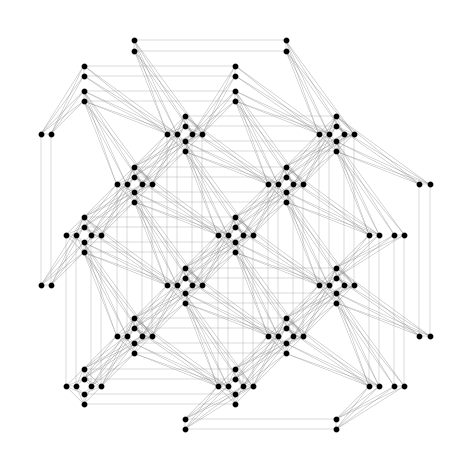

In [15]:
P = dnx.pegasus_graph(3)
#fig, ax = plt.subplots(layout="constrained")
dnx.draw_pegasus(P, with_labels=False, node_size = 10, width=0.2, crosses=True, node_color="black", edge_color="gray")
plt.gca().set_aspect('equal')
plt.savefig("..\Figures\pegasus.pdf", pad_inches=0, bbox_inches="tight")

In [3]:
# Define graph

edges = [
    (0,1),
    (2,3), (2,1), (3,1),
    (4,2),
    (5,6),
    (7,8), (7,6), (8,6),
    (9,6),
    (9,10), (9,11), (10,11), (10,6), (11,6),
    (12,10), (12,11), (12,6),
    (13,10), (13,11), (13,12),
    (14,12), (14,13), (14,15),
    (15,12), (15,13),
    (16,15), (16,14), (16,12),
    (17,16), (17,15), (17,14),
    (18,17), (18,15), (18,14),
    (20,19), (20,18), (20,17), (19,18), (19,17),
    (21,20), (21,19), (21,17),
    (25,24), (25,23), (25,22), (25,21), (24,23), (24,22), (24,21), (23,22), (23,21), (22,21)
]

G = defineGraph(edges)

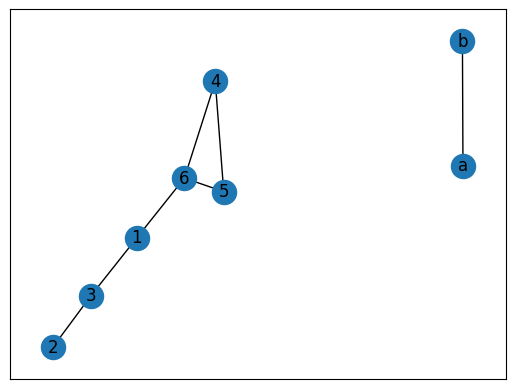

In [3]:
# Define graph

edges = [("a","b"), (1,3), (2,3), (4,5), (4,6), (5,6), (1,6)]

F = defineGraph(edges)

plotGraph(F)

In [9]:
# Define BQM

bqm = dimod.generators.maximum_independent_set(F.edges, F.nodes)

print(bqm.to_qubo())

({(2, 1): 2.0, (3, 1): 2.0, (3, 2): 2.0, (6, 1): 2.0, (4, 6): 2.0, (5, 6): 2.0, (5, 4): 2.0, (1, 1): -1.0, (2, 2): -1.0, (3, 3): -1.0, (6, 6): -1.0, (4, 4): -1.0, (5, 5): -1.0}, 0.0)


In [21]:
# Solve for MIS

sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads = 100)

In [22]:
# Inspector

dwave.inspector.show(sampleset)

Serving Inspector on http://127.0.0.1:18000/?problemId=b22765e7-70c3-4ebe-aa35-49b1a2d6c018

'http://127.0.0.1:18000/?problemId=b22765e7-70c3-4ebe-aa35-49b1a2d6c018'

In [12]:
# Print samples

df = sampleset.to_pandas_dataframe(True)
print(df)

                                 sample  energy  num_occurrences  \
0  {1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0}    -2.0                3   
1  {1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0}    -2.0                6   
2  {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1}    -2.0               14   
3  {1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0}    -2.0               18   
4  {1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}    -2.0               24   
5  {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1}    -2.0               13   
6  {1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0}    -2.0               14   
7  {1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0}    -2.0                8   

   chain_break_fraction  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0  


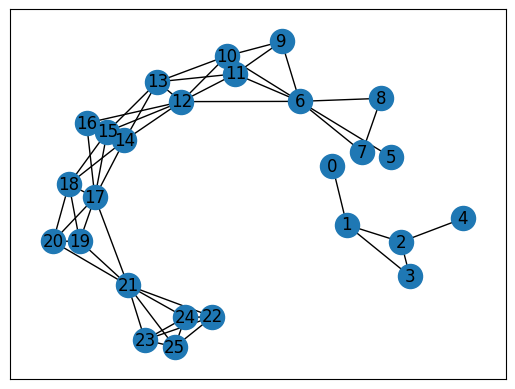

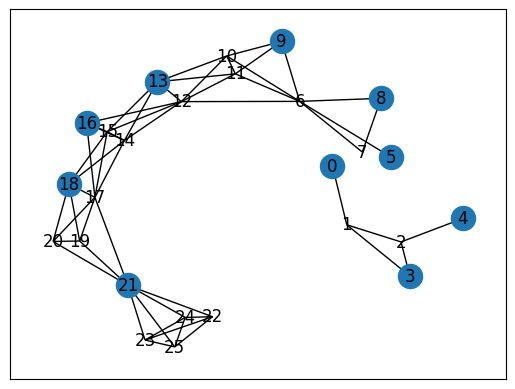

In [37]:
# Plot graphs

pos = nx.spring_layout(G, k=0.5) # Force specific layout

plotGraph(G, pos, 0)

sample = df["sample"][0]
nodes = [x for x in sample if sample[x] == 1]

plotGraph(G, pos, 1, nodeList=nodes)

plt.show()